# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Decision Tree, and will then apply a Decision Tree classsifier on the MNIST hand written digits dataset that we already saw.


## 1. Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2).
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily.
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


#### Answer
1. Let's implement the ID3 algorithm below:

In [26]:
import math

def entropy(n_tl, n_fl, rv=4):
    """rv - round value"""
    p_tl = n_tl / (n_tl + n_fl)
    p_fl = n_fl / (n_tl + n_fl)
    return round((-1) * (p_tl * (math.log2(p_tl) if p_tl !=0 else 0) + p_fl * (math.log2(p_fl) if p_fl !=0 else 0)), rv)

# roud till
rv = 4

print('Training examples entropy:')
print(f'H(S) = -(2 * 1/2 * log(1/2)) = {entropy(2,2)}')


print()
print (f'H(x1=1) = -(2/3 * log(2/3) + 1/3 * log(1/3)) = {entropy(2, 1)}')
print (f'H(x1=0) = {entropy(1,0)}')
gain_s_x1 = round(1 - 3/4 * entropy(2, 1), rv)
print(f'Gain(S, x1) = 1 -3/4 * {entropy(2, 1)} = {gain_s_x1}')

print()
print (f'H(x2=1) = {entropy(1,1)}')
print (f'H(x2=0) = {entropy(1,1)}')
print(f'Gain(S, x2) = 0')

print()
print (f'H(x3=1) = {entropy(1,1)}')
print (f'H(x3=0) = {entropy(1,1)}')
print(f'Gain(S, x3) = 0')

print()
print('x1 gives maximum Gain, therefore x1 is a root node.')
print("Let's find it's children.")
e_x1_1 = entropy(2,1)
print('Entropy x1 = 1')
print(f'H(x1=1) = {e_x1_1}')


print()
print (f'H(x2=1|x1=1) = {entropy(1,1)}')
print (f'H(x2=0|x1=1) = {entropy(1,0)}')
print(f'Gain(H(x1=1), x3) = {round(e_x1_1 - 2/3 * entropy(1,1), rv)}')

print()
print (f'H(x3=1|x1=1) = {entropy(1,0)}')
print (f'H(x3=0|x1=1) = {entropy(1,1)}')
print(f'Gain(H(x1=1), x3) = {round(e_x1_1 - 2/3 * entropy(1,1), rv)}')

print("The gains of x2 and x3 given x1=1 are equal, hence it doesn't matter what we will choose, let's pick x2")

print("For x1=1 and x2=0 the result is 1, and for x1=1 and x2=1 the result will be 1")

Training examples entropy:
H(S) = -(2 * 1/2 * log(1/2)) = 1.0

H(x1=1) = -(2/3 * log(2/3) + 1/3 * log(1/3)) = 0.9183
H(x1=0) = -0.0
Gain(S, x1) = 1 -3/4 * 0.9183 = 0.3113

H(x2=1) = 1.0
H(x2=0) = 1.0
Gain(S, x2) = 0

H(x3=1) = 1.0
H(x3=0) = 1.0
Gain(S, x3) = 0

x1 gives maximum Gain, therefore x1 is a root node.
Let's find it's children.
Entropy x1 = 1
H(x1=1) = 0.9183

H(x2=1|x1=1) = 1.0
H(x2=0|x1=1) = -0.0
Gain(H(x1=1), x3) = 0.2516

H(x3=1|x1=1) = -0.0
H(x3=0|x1=1) = 1.0
Gain(H(x1=1), x3) = 0.2516
The gains of x2 and x3 given x1=1 are equal, hence it doesn't matter what we will choose, let's pick x2
For x1=1 and x2=0 the result is 1, and for x1=1 and x2=1 the result will be 1


According to the above the decision tree looks like:

![dt_gain](x1_1.png)

<u>Show that the training error of the resulting decision tree is at least 1/4.</u>

1. If x1 = 0 according to the decision tree y = 0 which is correct
2. If x1 = 1 and x2 = 0 according to the decision tree y = 0 which is also correct
3. But if x1 = 1 and x2 = 1 the algorithm in both casese will yield 1.
Given that the function for the error is: $$\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$ we can calculate the error for out case: $$\frac{1}{4}(0 + 0 + 0 + (1-0)^2) = \frac{1}{4}$$

2. A decision tree of depth 2, which attains zero training error.

![dt](x2.png) 

## 2. Implementing Decision Tree From Scratch
In this exercise you will need to implement a simple version of Decision Tree from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes).

* Compelete the skeleton class below
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `min_leaf` is the minimal number of samples in each leaf node
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(nlgn)$ time).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* To check your decision tree implementation, use the boston dataset: (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) split the data set into train and test using (`from sklearn.model_selection import train_test_split`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
    for min_leaf in [1,5,10,100]:
      dt = DecisionTree(X, y, n, sz, min_leaf)
      mse = # mean square error over test set
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = dt.predict(X_train)  # forest is the chosen model
  plt.scatter(y_hat, y_test)
  ```

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
class DecisionTree():
    def __init__(self, X, y, min_leaf):
        self.data = X
        self.y = y
        self.min_leaf = min_leaf
        self.root = self.grow_tree(self.data, self.y)

    def grow_tree(self, X, y, depth=0):

        # check constraint
        if X.shape[0] <= self.min_leaf:
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        # find the best split
        best_feature_ixd, best_threshold = self._best_split(X, y)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature_ixd], best_threshold)

        left = self.grow_tree(X[list(left_idxs), :], y[left_idxs], depth+1)
        right = self.grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
            
        return Node(best_feature_ixd, best_threshold, left, right)

    def _best_split(self, X, y):
        
        best_feature_ixd, best_threshold = None, None
        lowest_mse = self._squared_error(y)

        for feat_idx in range(X.shape[1]):
            
            # define possible thresholds for the split
            X_column = X[:, feat_idx]
            X_column_uv = np.unique(X_column)
            
            # define a step for tresholds
            tr_step = 1/len(X_column_uv)
            # define array of probabilities 
            tr_prob = np.arange(start=1, stop=(len(X_column_uv)))
            # define array of tresholds
            #print(X_column_uv)
            thresholds = np.quantile(X_column_uv, tr_prob * tr_step)
            

            for threshold in thresholds:
                # getting the left and right nodes
                left_idxs, right_idxs = self._split(X_column, threshold)

                # calculate the weighted avg. mse of children
                n = len(y)
                n_l, n_r = len(left_idxs), len(right_idxs)
                mse_l = self._squared_error(y[left_idxs]) 
                mse_r = self._squared_error(y[right_idxs])
                child_mse = (n_l/n) * mse_l + (n_r/n) * mse_r
                if best_feature_ixd is None:
                    best_feature_ixd = feat_idx
                if best_threshold is None:
                    best_threshold = threshold

                if lowest_mse > child_mse:
                    lowest_mse = child_mse
                    best_feature_ixd = feat_idx
                    best_threshold = threshold

        return best_feature_ixd, best_threshold

    def _split(self, X_column, split_thresh):        
        # get indicies after the split
        left_idxs = np.where(X_column <= split_thresh)
        right_idxs = np.where(X_column > split_thresh)

        return left_idxs[0], right_idxs[0]

    def _squared_error(self, y):
        # calculate the mean value for all observations
        y_mean = np.mean(y)

        # calculate the residuals to y_mean
        mean_squared_error = np.mean((y - y_mean)**2)

        return mean_squared_error
      

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)

        return self._traverse_tree(x, node.right)
  

class Node():
    def __init__(
                    self, 
                    feature=None, 
                    threshold=None, 
                    left=None, 
                    right=None, 
                    value=None
                ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value # is it a leave node?

    def is_leaf_node(self):
        return self.value is not None



In [5]:
# use the boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [6]:
from sklearn.metrics import mean_squared_error

# estimate what are the best hyper parameters to use for your model
for min_leaf in [1, 5, 10, 20, 50, 100]:
      dt = DecisionTree(X_train, y_train, min_leaf)
      y_pred = dt.predict(X_test)
      mse = mean_squared_error(y_pred, y_test)
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))

min_leaf:1 --- oob mse: 17.22666666666667
min_leaf:5 --- oob mse: 11.923412227668846
min_leaf:10 --- oob mse: 10.9261616495518
min_leaf:20 --- oob mse: 11.042765397440863
min_leaf:50 --- oob mse: 12.452203370313114
min_leaf:100 --- oob mse: 19.70987506596517


The best result appears when min_leaf is equal to 10

Text(0, 0.5, 'y_train')

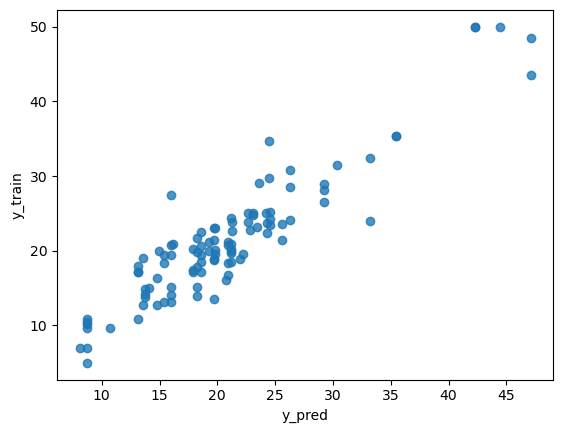

In [7]:
# plot the predictions vs. true values of all the samples in the training set

best_dt = DecisionTree(X_train, y_train, 10)
y_pred = best_dt.predict(X_test)
plt.scatter(x=y_pred, y=y_test, label=True, alpha=0.8)
plt.xlabel('y_pred')
plt.ylabel('y_train')

## 3. Using Decision Tree for Digits Classification
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
  - You can use `sklearn.tree.DecisionTreeClassifier`
- Once you are satisfied with the model parameters, plot the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

In [1]:
# code and answer go here
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
dt_sk = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)
dt_sk.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_sk.predict(X_test)

Accuracy: 0.8727857142857143


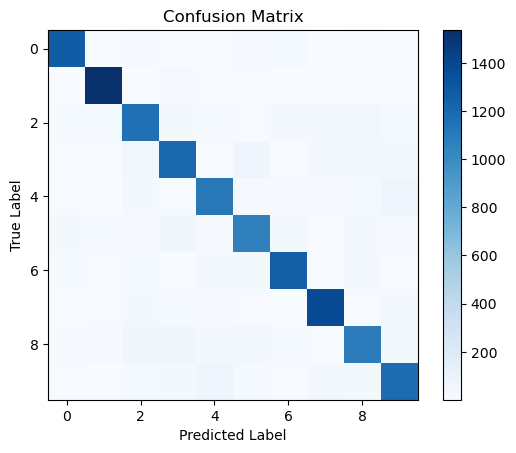

In [22]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Labeling the axes
classes = list(np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

plt.show()

After some tweaking the model the highest accuracy score appears with the parameter min_samples_leaf equal to 5, and other parametrs using their default values.

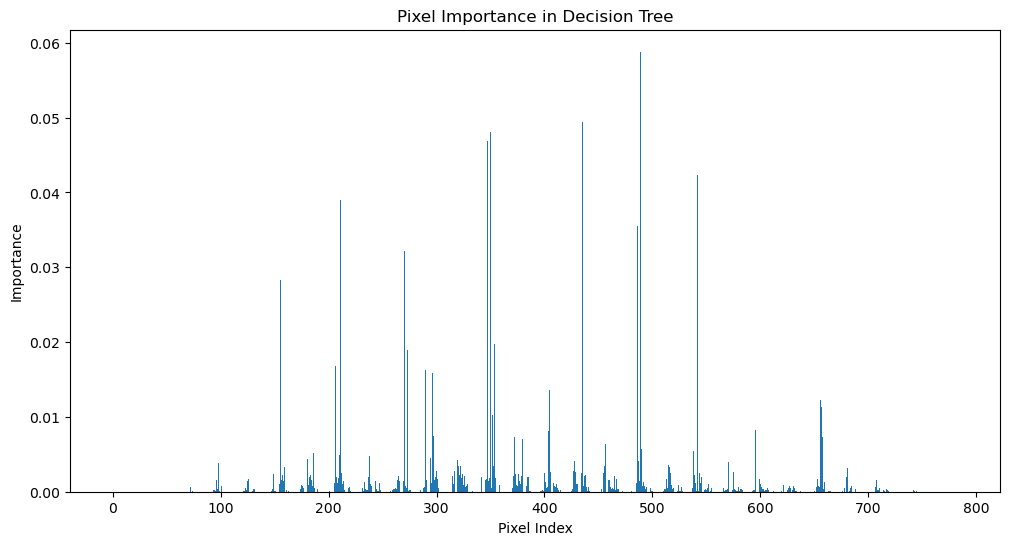

In [23]:
# plot the importance of each of the pixels to the final decision.
plt.figure(figsize=(12, 6))
plt.bar(range(len(dt_sk.feature_importances_)), dt_sk.feature_importances_)
plt.title("Pixel Importance in Decision Tree")
plt.xlabel("Pixel Index")
plt.ylabel("Importance")
plt.show()

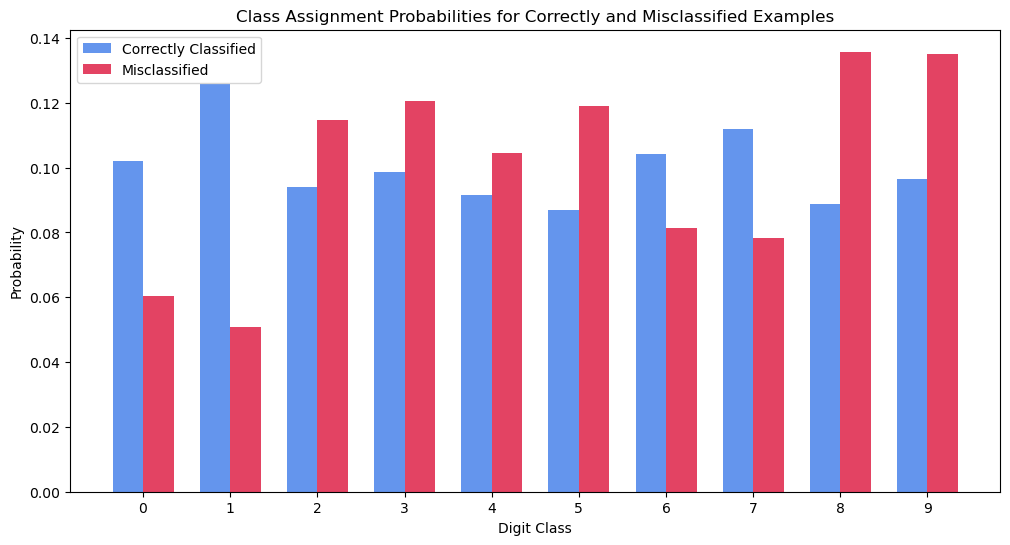

In [36]:
# estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
# Predict class probabilities
class_probabilities = dt_sk.predict_proba(X_test)

# Find correctly and incorrectly classified examples
c_indices = np.where(y_pred == y_test)[0]
w_indices = np.where(y_pred != y_test)[0]

# Class assignment probabilities for correctly classified examples
c_class_probabilities = class_probabilities[c_indices]

# Class assignment probabilities for misclassified examples
w_class_probabilities = class_probabilities[w_indices]

# Plot class assignment probabilities for both correctly and misclassified examples
plt.figure(figsize=(12, 6))

# Bar positions to move bars
bar_width = 0.35
bar_positions = np.arange(10)

# correctly classified examples
plt.bar(bar_positions, np.mean(c_class_probabilities, axis=0), width=bar_width, color='cornflowerblue', label='Correctly Classified')

# misclassified examples
plt.bar(bar_positions + bar_width, np.mean(w_class_probabilities, axis=0), width=bar_width, color='crimson', label='Misclassified', alpha=0.8)

plt.title("Class Assignment Probabilities for Correctly and Misclassified Examples")
plt.xlabel("Digit Class")
plt.ylabel("Probability")
plt.xticks(bar_positions + bar_width / 2, [str(i) for i in range(10)])
plt.legend()
plt.show()

For the numbers 0, 1, and 7, the bars representing the class assignment probabilities for correctly classified examples are relatively higher, indicating that the model tends to correctly classify these digits with higher confidence.

On the other hand, for the numbers 8 and 9, the bars representing the class assignment probabilities for misclassified examples are relatively higher, suggesting that the model might struggle more with these digits, leading to higher probabilities of misclassification.

In [ ]:
# parameters = {'criterion': ('gini', 'entropy'),
#               'min_samples_leaf': (50, 10, 5, 2),
#               'max_depth': (5, 10, None)
#                }


# grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, cv=3, scoring='accuracy') #, n_jobs=-1)
# grid_search_dt.fit(X_train, y_train)
# best_grid_score = grid_search_dt.best_score_

# print("GridSearchCV DecisionTree Accuracy: %.3f" % best_grid_score)
# print(grid_search_dt.best_params_)